In [ ]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.datasets import load_breast_cancer
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# Binary Classification
cancer.target_names
# Two classes of the cancer - malignant and benign

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['target'] = cancer.target

In [ ]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [ ]:
df[df.target ==1].head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.01460,0.02387,0.01315,0.01980,0.002300,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.70,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,1


In [ ]:
#Converting the numerical target column to categorical
df['cancer class'] = df.target.apply(lambda x:cancer.target_names[x])

In [ ]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant


In [ ]:
df0 = df[:50]
df1 = df[50:100]

In [ ]:
import matplotlib.pyplot as plt


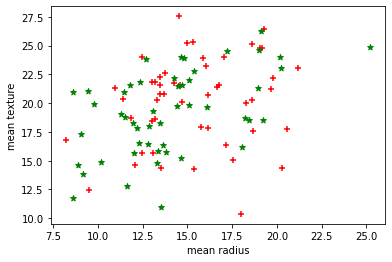

In [ ]:
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(df0['mean radius'], df0['mean texture'], color = 'red', marker = '+')
plt.scatter(df1['mean radius'], df1['mean texture'], color = 'green', marker = '*')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target', 'cancer class'], axis = 'columns')

y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 5)

In [ ]:
len(X_train)

426

In [ ]:
len(X_test)

143

In [ ]:
#SVC -Support vector classification
# SVR - for regression
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
model = svc.fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)

0.951048951048951

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  7],
       [ 0, 88]])

In [ ]:
#Hyperparameter tuning

model_c = SVC(C=1)
model_c.fit(X_train,y_train)
model_c.score(X_test, y_test)

0.951048951048951

In [ ]:
model_c = SVC(C=2)
model_c.fit(X_train,y_train)
model_c.score(X_test, y_test)

0.958041958041958

In [ ]:
model_c = SVC(C=10)
model_c.fit(X_train,y_train)
model_c.score(X_test, y_test)

0.9440559440559441

# Kernel

In [ ]:
# SVC is supported by kernel and this kernel will make the model more accurate
model_kernel = SVC(kernel = 'linear')
model_kernel.fit(X_train,y_train)
model_kernel.score(X_test, y_test)

0.9790209790209791

# Python List Comprehension

In [ ]:
squares = []
for i in range(1, 10):
  squares.append(i*i)

squares

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
# Rewrite the same code in a single line of code
# Comprehension - Concise
squares = [ i * i for i in range(1,10)]

# i*i is expresssion - some values
# for loop
# i is member of list or iterable

# [expression for x in list iterable]
squares

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
#for outer value of for loop the inner will run
m = [[j for j in range(5)] for i in range(6)]
m

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]

In [ ]:
# using If condition
# list comprehension is like bottom to top approach code as written in normal coding
l = [1,2,3,4]
new_l = [i**3 if i%2 == 0 else i**2 for i in l]
new_l

[1, 8, 9, 64]